# Modello di Ising

Simulare con il metodo di Metropolis il modello di Ising


$$ H = − J \sum\limits_{\langle ij  \rangle} S_i S_j $$


dove $ S_i = ±1 $, su un reticolo quadrato in $ 2 $ dimensioni con condizioni periodiche.
Porre $ J = 1 $, $ L = 100 $, e la temperatura $ T = 2.3 $, di poco superiore alla temperatura critica
$ T_c = 2ln(1+√2) \simeq 2.269 $.
Partire dalla condizione iniziale $ S_i ≡ 1 $, e plottare la magnetizzazione ogni $ 10^3 $ step Monte Carlo, fino al tempo massimo di $ 10^6 $ step Monte Carlo.

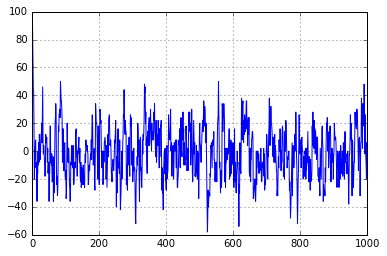

In [1]:
import numpy
import matplotlib.pyplot as mpl

% matplotlib inline

L = 10

ITERATIONS = L * L

STEPS = 10 ** 3

T = 2.3

M = [L * L]


def costruisci_reticolo(L):
    
    reticolo = numpy.zeros((L, L))

    for i in range(L):

        for j in range(L):
            reticolo[i, j] = 1

    return reticolo


def bc(i):
    
    if i + 1 > L - 1:
        return 0
    if i - 1 < 0:
        return L - 1
    else:
        return i


def delta_energy(reticolo, i, j):
    
    return reticolo[i, j] * (reticolo[bc(i - 1), j] +
                             reticolo[bc(i + 1), j] +
                             reticolo[i, bc(j - 1)] +
                             reticolo[i, bc(j + 1)])


reticolo = costruisci_reticolo(L)

for n in range(STEPS):

    for k in range(ITERATIONS):

        i = numpy.random.randint(0, L)
        j = numpy.random.randint(0, L)
        DE = delta_energy(reticolo, i, j)

        if DE < 0:

            reticolo[i, j] = -reticolo[i, j]

        elif numpy.exp(-1 / T * DE) > numpy.random.rand():

            reticolo[i, j] = -reticolo[i, j]

    if STEPS % L*L == 0:
        M.append(reticolo.sum())  # prendendo mu = 1)

mpl.figure()
mpl.plot(M)
mpl.grid()
mpl.show()

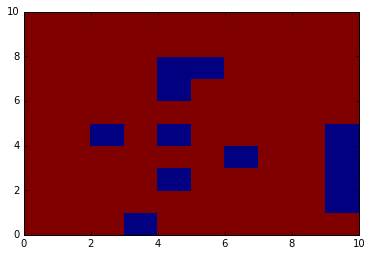

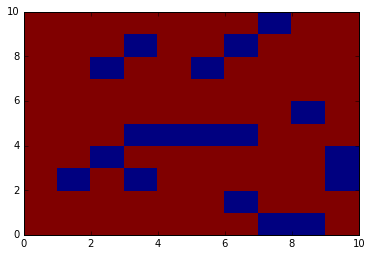

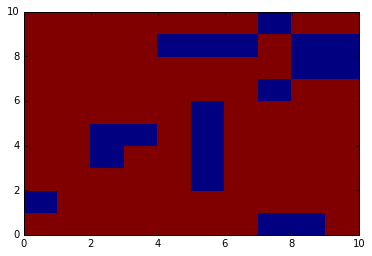

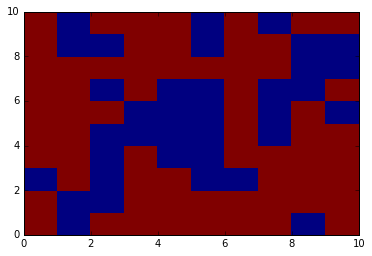

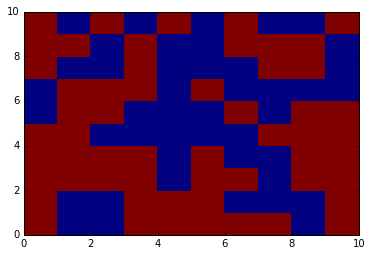

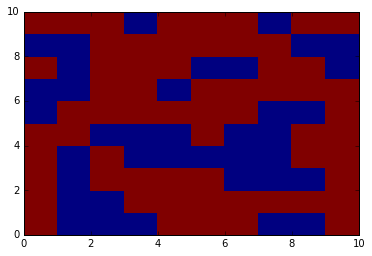

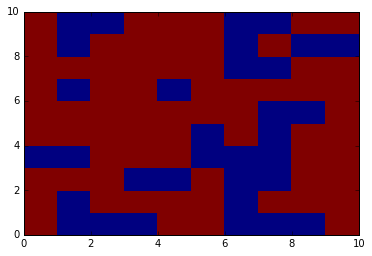

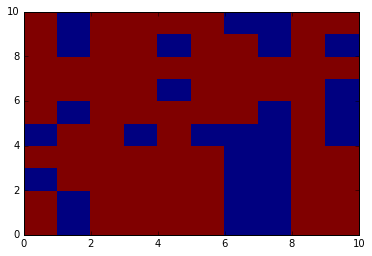

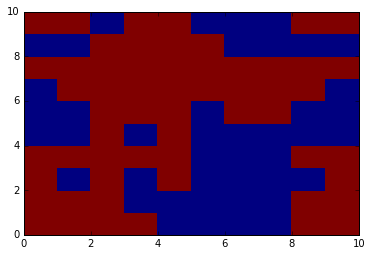

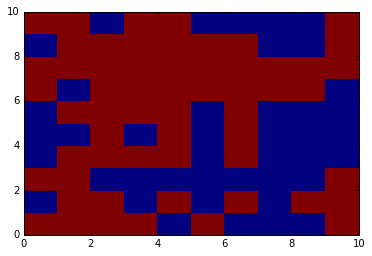

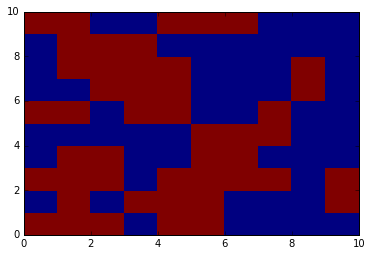

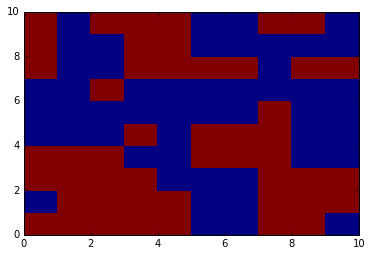

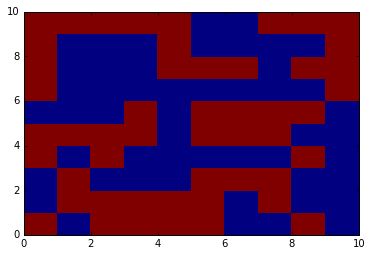

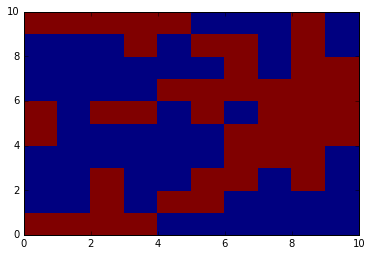

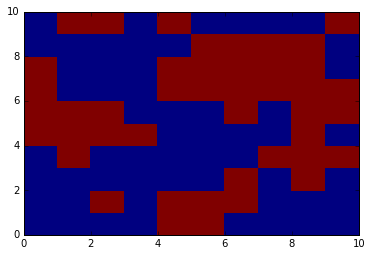

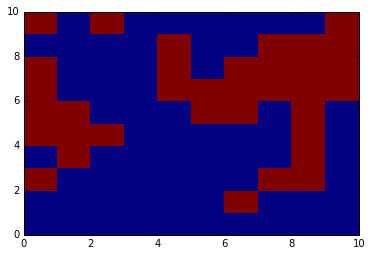

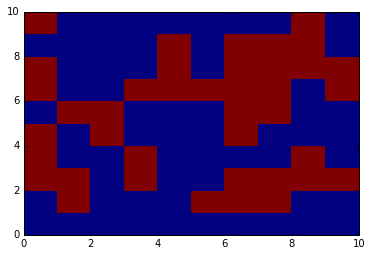

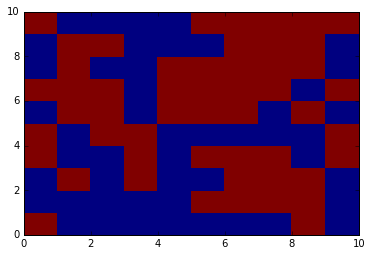

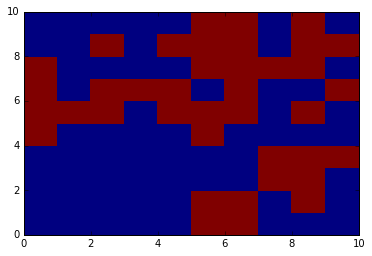

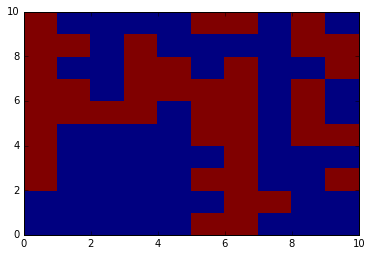

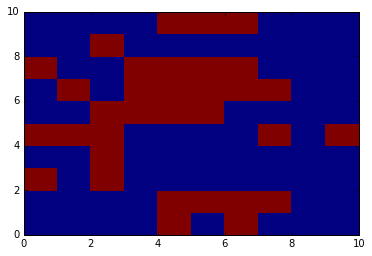

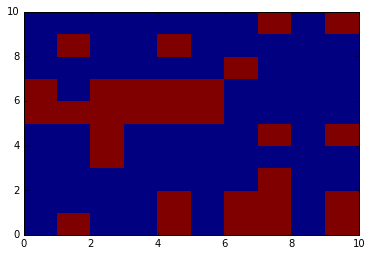

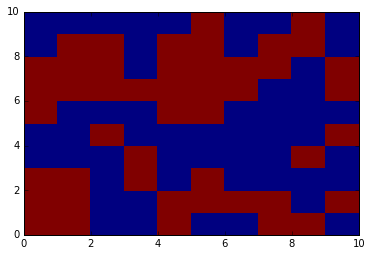

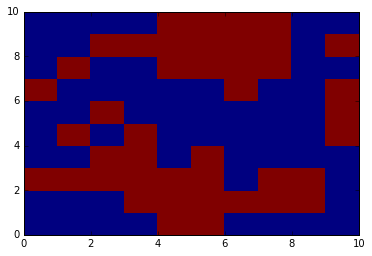

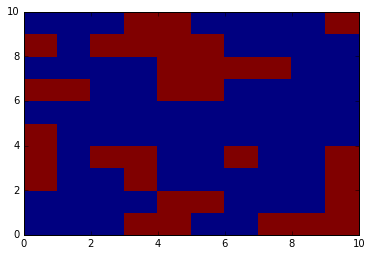

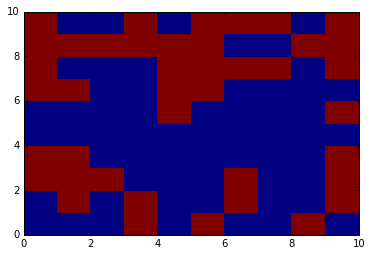

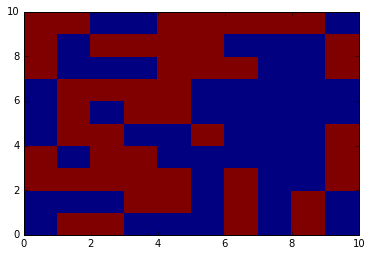

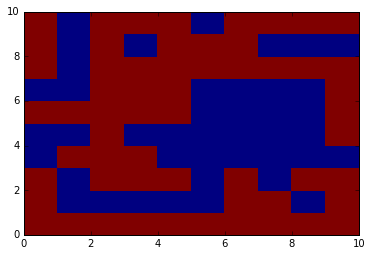

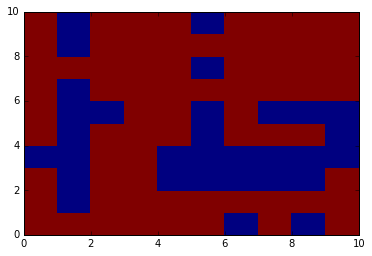

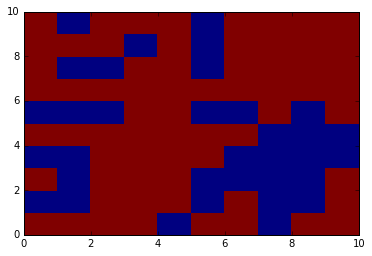

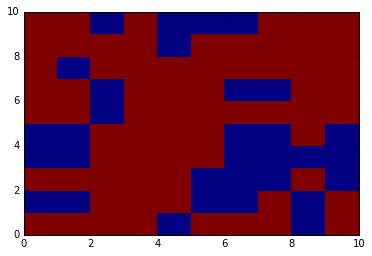

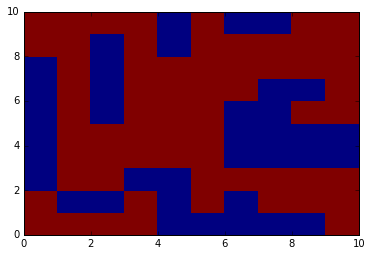

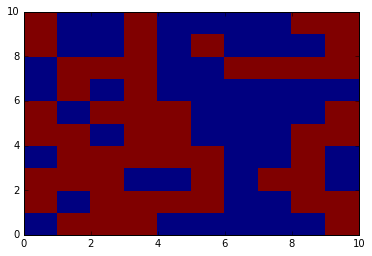

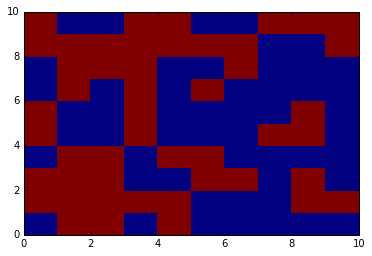

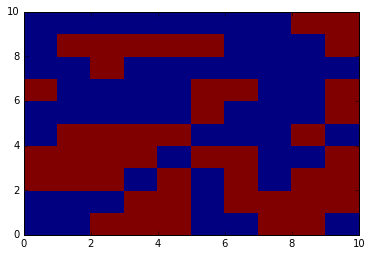

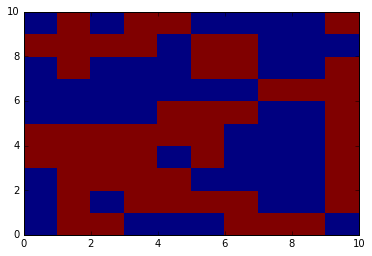

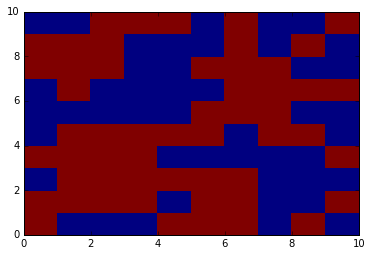

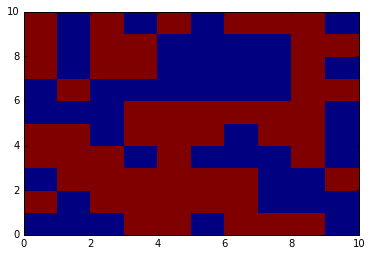

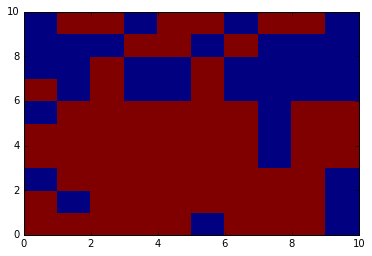

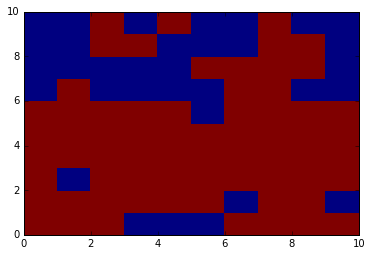

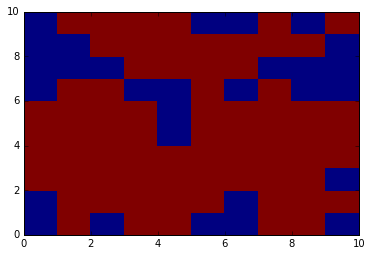

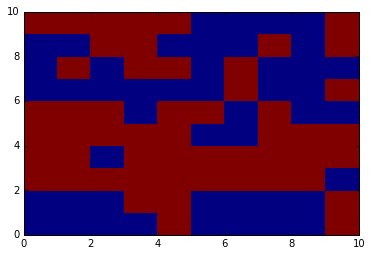

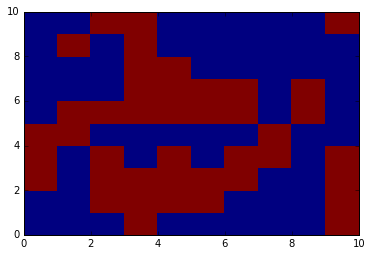

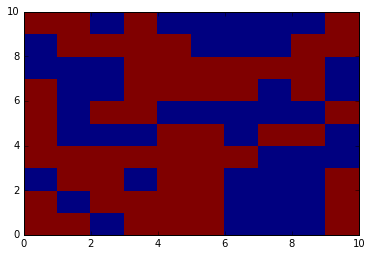

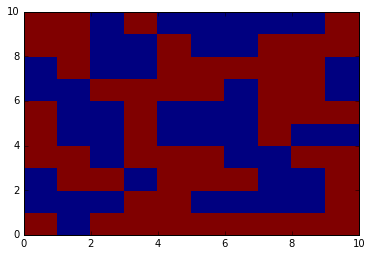

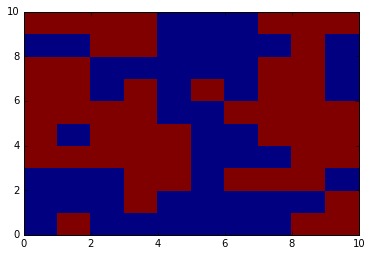

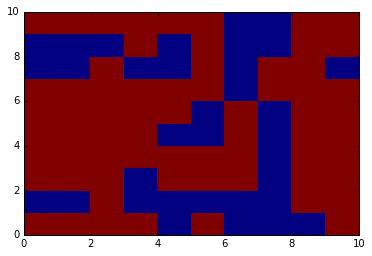

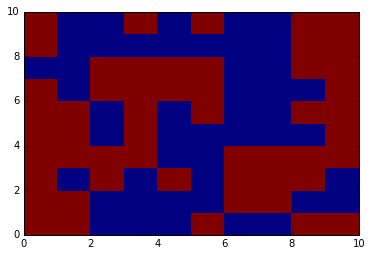

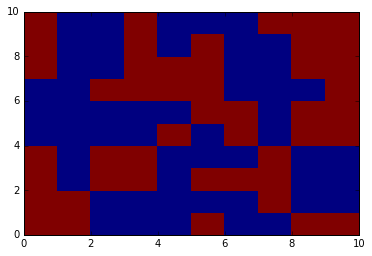

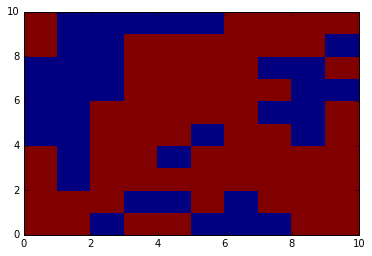

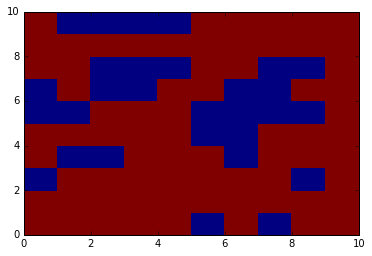

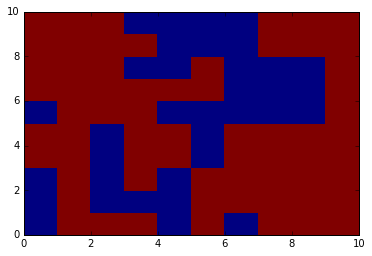

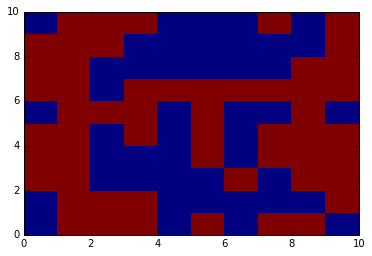

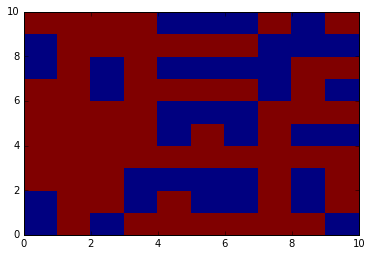

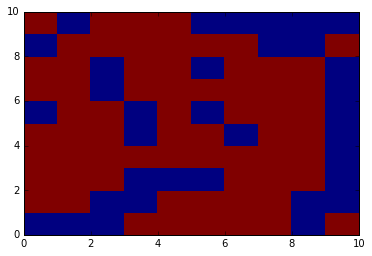

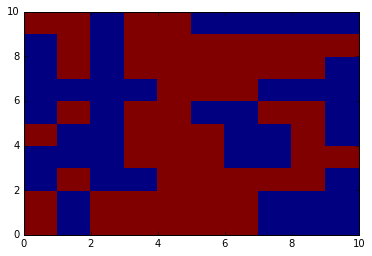

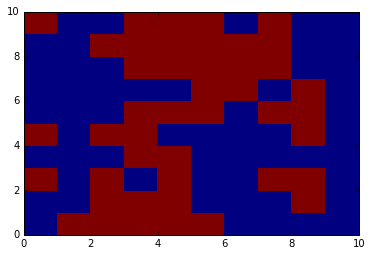

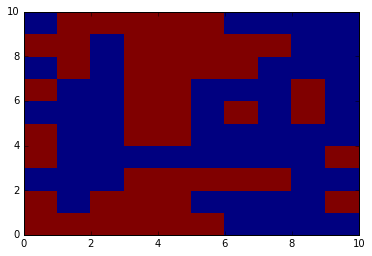

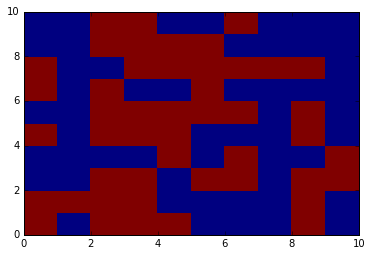

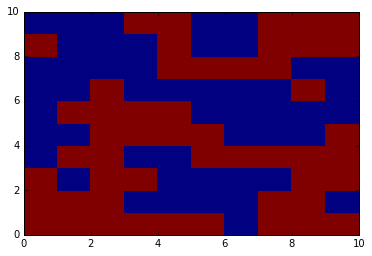

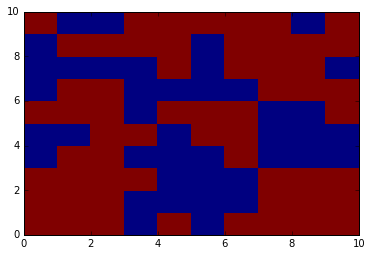

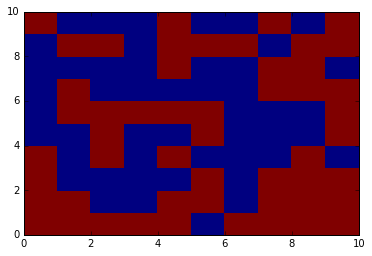

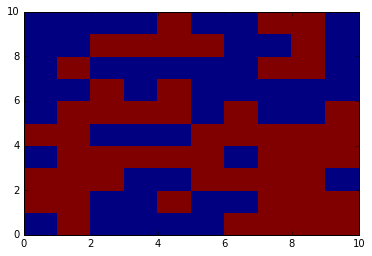

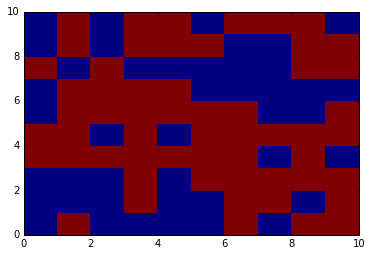

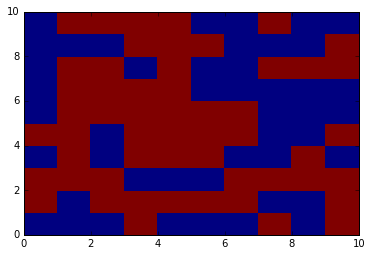

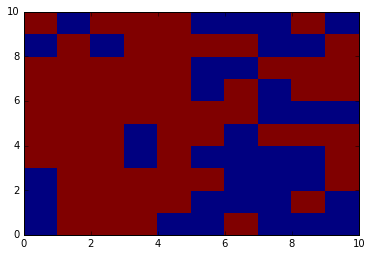

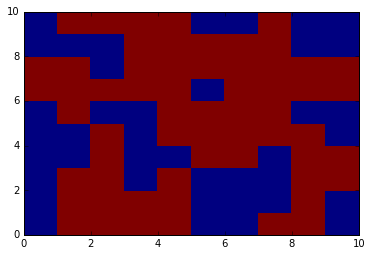

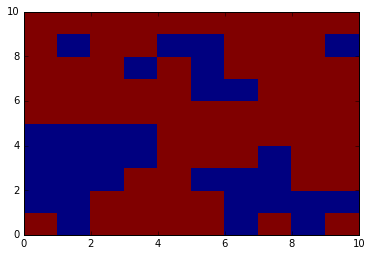

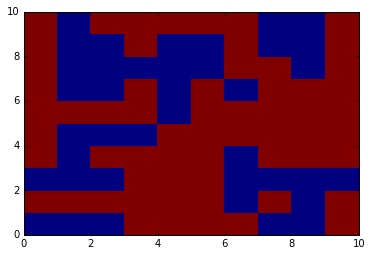

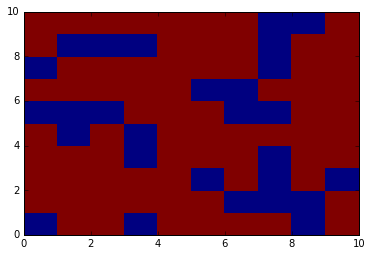

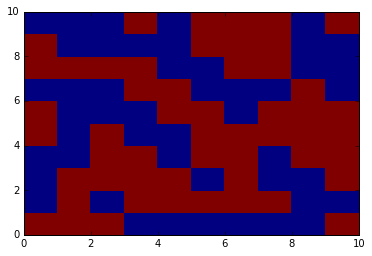

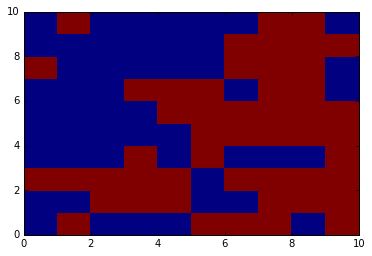

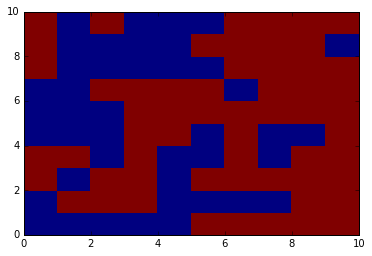

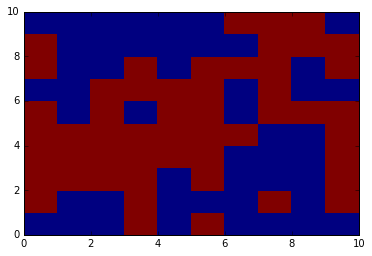

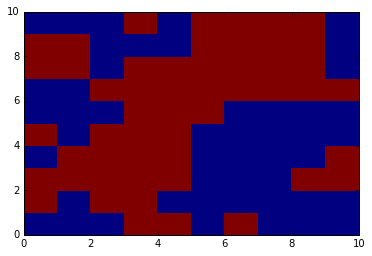

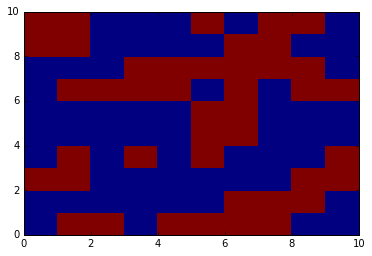

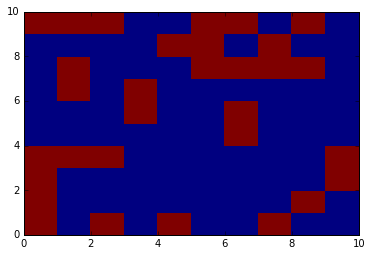

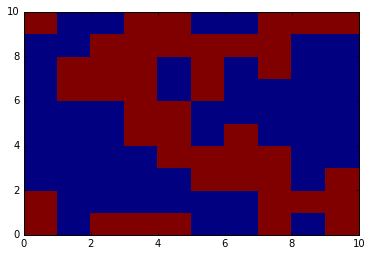

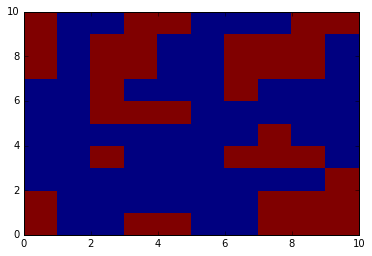

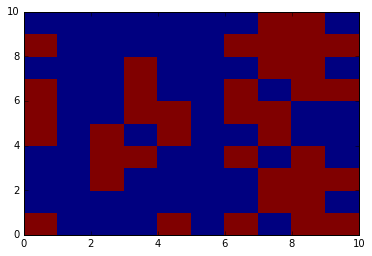

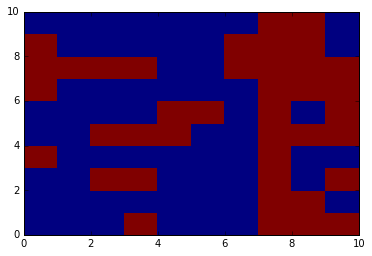

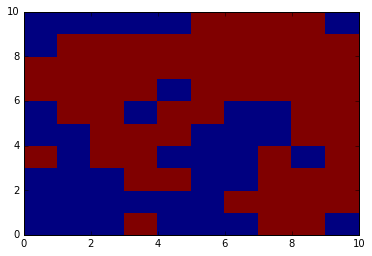

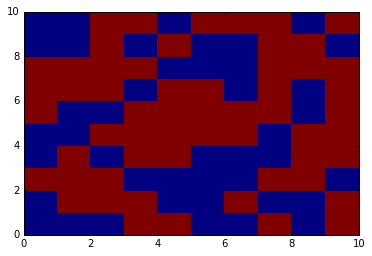

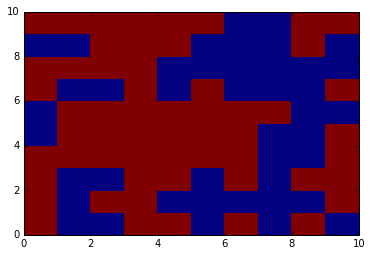

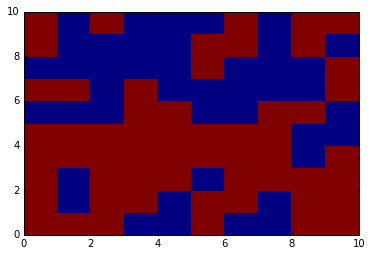

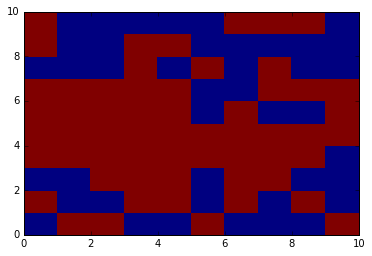

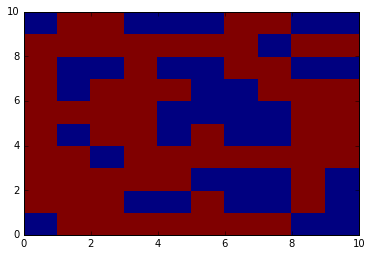

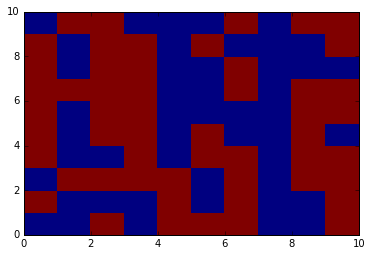

In [ ]:
import numpy
import matplotlib.pyplot as mpl
from ipywidgets import *

#% matplotlib inline

L = 10

ITERATIONS = L * L

STEPS = 10 ** 3

T = 2.3

M = [L * L]


def costruisci_reticolo(L):
    
    reticolo = numpy.zeros((L, L))

    for i in range(L):

        for j in range(L):
            reticolo[i, j] = 1

    return reticolo


def bc(i):
    
    if i + 1 > L - 1:
        return 0
    if i - 1 < 0:
        return L - 1
    else:
        return i


def delta_energy(reticolo, i, j):
    
    return reticolo[i, j] * (reticolo[bc(i - 1), j] +
                             reticolo[bc(i + 1), j] +
                             reticolo[i, bc(j - 1)] +
                             reticolo[i, bc(j + 1)])


reticolo = costruisci_reticolo(L)

for n in range(STEPS):

    for k in range(ITERATIONS):

        i = numpy.random.randint(0, L)
        j = numpy.random.randint(0, L)
        DE = delta_energy(reticolo, i, j)

        if DE < 0:

            reticolo[i, j] = -reticolo[i, j]

        elif numpy.exp(-1 / T * DE) > numpy.random.rand():

            reticolo[i, j] = -reticolo[i, j]

    if STEPS % L*L == 0:
        M.append(reticolo.sum())  # prendendo mu = 1)
        
        
        mpl.pcolor(reticolo)
        mpl.show()
        
        
mpl.figure()
mpl.plot(M)
mpl.grid()
mpl.show()
